# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

new_df = pd.read_csv("/content/drive/MyDrive/Thyroid_ML_Project/Exploration/numericalDF.csv")
new_df.head(7)

,Unnamed: 0,age,sex,query_hyperthyroid,TSH,T3,TT4,T4U,FTI,target
0,0,29.0,0,0,0.300000,2.010773,105.497565,0.967297,110.941312,0.0
1,1,29.0,0,0,1.600000,1.900000,128.000000,0.967297,110.941312,0.0
2,2,41.0,0,1,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
3,3,36.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
4,4,60.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
5,5,77.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
6,6,28.0,0,0,0.700000,2.600000,116.000000,0.967297,110.941312,0.0


In [ ]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
new_df.target.value_counts()

,count
target,
0.0,6553
1.0,6553
2.0,6553


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19659 entries, 0 to 19658
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 19659 non-null  float64
 1   sex                 19659 non-null  int64  
 2   query_hyperthyroid  19659 non-null  int64  
 3   TSH                 19659 non-null  float64
 4   T3                  19659 non-null  float64
 5   TT4                 19659 non-null  float64
 6   T4U                 19659 non-null  float64
 7   FTI                 19659 non-null  float64
 8   target              19659 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


# Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = new_df.drop('target', axis=1)
y = new_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train, y_train)
print(svm_model.score(X_train, y_train))

y_pred = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9664271634768233
0.9605798575788402
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1293
         1.0       0.97      0.96      0.97      1315
         2.0       0.95      0.99      0.97      1324

    accuracy                           0.96      3932
   macro avg       0.96      0.96      0.96      3932
weighted avg       0.96      0.96      0.96      3932



In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08825025432349949

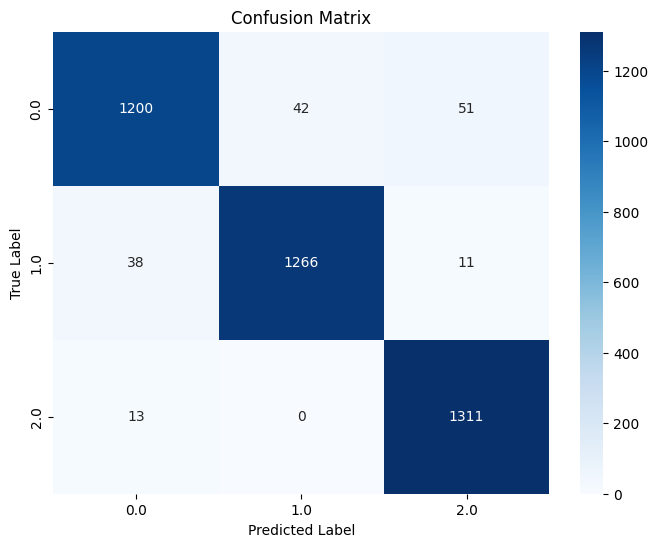

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0.0, 1.0,2.0])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0.0, 1.0,2.0], yticklabels=[0.0, 1.0,2.0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()